In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_excel("data_students.xls", sheet_name="Training_Data")
df.head()

,STG,SCG,STR,LPR,PEG,Unnamed: 5,Unnamed: 6,Attribute Information:
0,0.08,0.08,0.10,0.24,0.90,NaN,NaN,STG (The degree of study time for goal object ...
1,0.06,0.06,0.05,0.25,0.33,NaN,NaN,SCG (The degree of repetition number of user f...
2,0.10,0.10,0.15,0.65,0.30,NaN,NaN,STR (The degree of study time of user for rela...
3,0.08,0.08,0.08,0.98,0.24,NaN,NaN,LPR (The exam performance of user for related ...
4,0.09,0.15,0.40,0.10,0.66,NaN,NaN,PEG (The exam performance of user for goal obj...


In [51]:
df = df.loc[:, ["STG", "SCG", "STR", "LPR", "PEG"]]
df.describe()

,STG,SCG,STR,LPR,PEG
count,402.000000,402.000000,402.000000,402.000000,402.000000
mean,0.354020,0.356826,0.458794,0.432415,0.457495
std,0.211546,0.215064,0.245929,0.256962,0.266131
min,0.000000,0.000000,0.010000,0.000000,0.000000
25%,0.200000,0.200000,0.270000,0.250000,0.250000
50%,0.302500,0.300000,0.445000,0.330000,0.400000
75%,0.480000,0.510000,0.680000,0.650000,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.990000


درصورتیکه بتوان همبستگی بین فیچرها را تشخیص داد میتوانیم چند مورد را کم کنیم تا مصورسازی بهتری داشته باشیم

ولی فیچرها همبسته نیستند.


<Figure size 600x600 with 0 Axes>

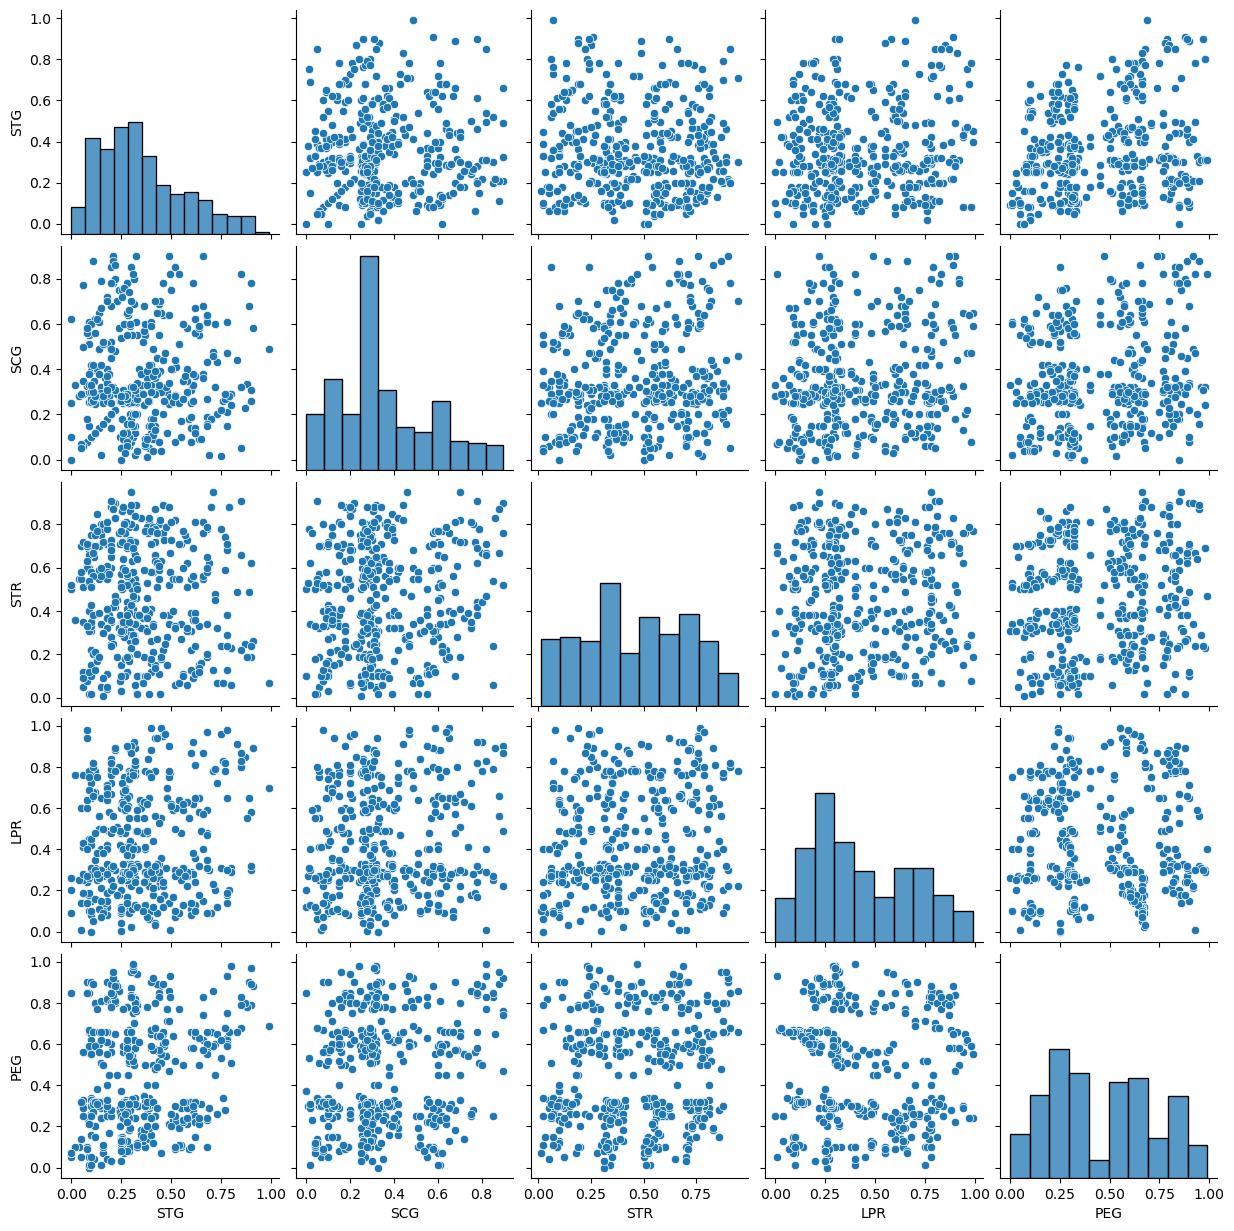

In [52]:
plt.figure(figsize=(6,6))
sns.pairplot(df)

(Text(0.5, 0, 'STG'), Text(0, 0.5, 'PEG'))

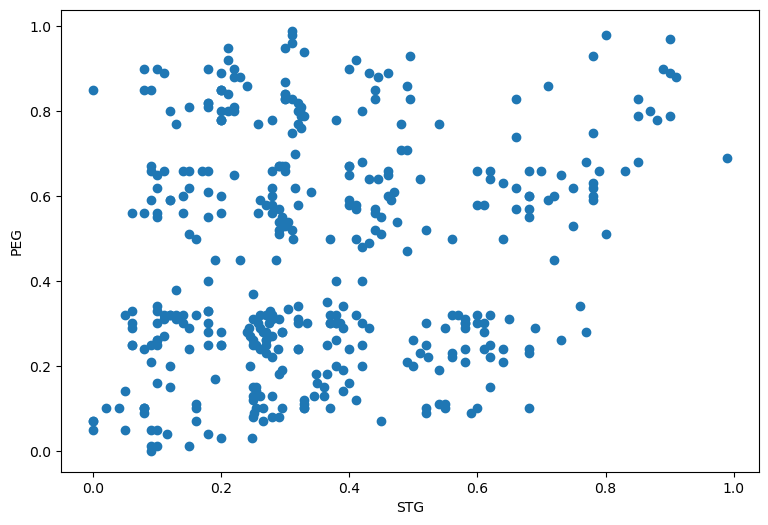

In [4]:
fig = plt.figure(figsize=(9,6))
X = df[['STG' , 'PEG']].values
plt.scatter(X[:,0], X[:,1])
plt.xlabel('STG') , plt.ylabel('PEG')

### KMeans Clustering

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [45]:
inertia = []
for cl_num in range(1 , 10):
    km = KMeans(n_clusters = cl_num, max_iter=100, n_init='auto', random_state= 100)
    km.fit(X)
    inertia.append(km.inertia_)

(Text(0.5, 0, 'Number of Clusters'), Text(0, 0.5, 'Inertia'))

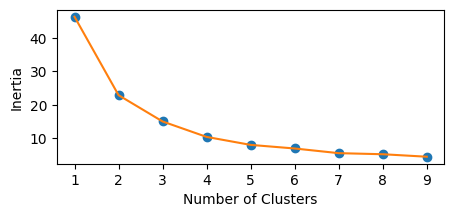

In [46]:
fig = plt.figure(figsize=(5, 2))

plt.plot(np.arange(1 , 10) , inertia , 'o')
plt.plot(np.arange(1 , 10) , inertia , '-')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')

In [29]:
k = 3
km_cluster = KMeans(n_clusters = k , n_init = 'auto',max_iter=200, random_state= 120)
km_cluster.fit(X)
labels = km_cluster.labels_
centroids = km_cluster.cluster_centers_

Text(0.5, 1.0, 'Find groups in students Data')

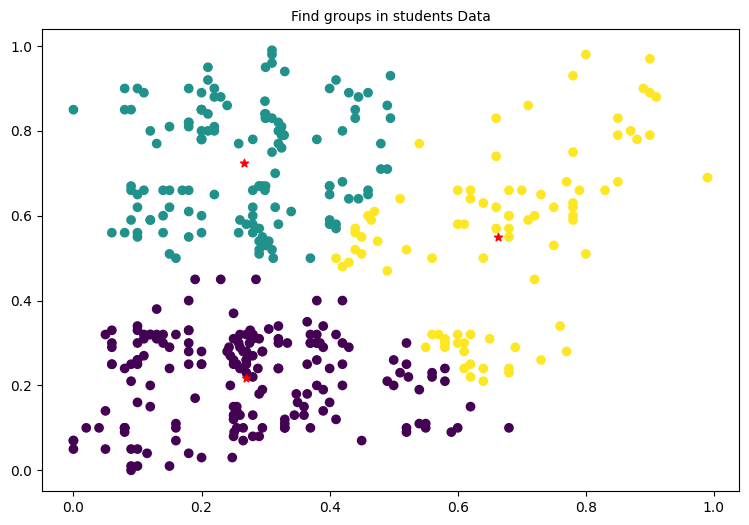

In [40]:
fig = plt.figure(figsize=(9, 6))

plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centroids[:,0] ,centroids[:,1], color='red', marker="*")
plt.title("Find Unknown groups in students Data", fontsize=10)

In [43]:
davies_bouldin_score(X, labels)

0.8328288084785589

### DBSCAN

In [8]:
from sklearn.cluster import DBSCAN

In [67]:
X.shape

(402, 2)

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5 color=yellow>
        <div  align=center>
            سوال: امتیاز کلاسترینگ در دی بی اسکن  غیر از بولدین نداریم؟ اینکه نتیجه خوب هست یا بد یا اینکه نقاطی که طبقه بندی نشده اند


In [123]:
eps = 0.07
min_samples = 6
result=pd.DataFrame(columns=['eps', 'min_samples', 'ClustersCounts', 'BouldinScore' , 'NoclusterSamples'])
i=0
for eps in [0.01,0.03,0.05,0.07,0.1]:
    for min_samples in [4,5,6,8]:
        i+=1
        dbscan = DBSCAN(eps=eps, min_samples = min_samples)
        dbscan.fit(X)
        cluster_dbscan = list(set(dbscan.labels_))
        # dbscan.labels_
        try:
            ClustersCounts=len(cluster_dbscan)
            BouldinScore= davies_bouldin_score(X, dbscan.labels_)
            NoclusterSamples=np.unique((dbscan.labels_ == -1), return_counts=True)[1][1]
            result.loc[i,:]=[eps, min_samples, ClustersCounts, BouldinScore , NoclusterSamples]
        except:
            print('error', len(cluster_dbscan))
result.sort_values('ClustersCounts')


error 1
error 1
error 1


,eps,min_samples,ClustersCounts,BouldinScore,NoclusterSamples
18,0.1,5,2,0.714693,4
17,0.1,4,2,0.714693,4
1,0.01,4,3,1.269523,394
19,0.1,6,3,2.232541,4
20,0.1,8,3,1.649511,6
13,0.07,4,6,1.700996,16
15,0.07,6,6,1.546125,30
16,0.07,8,6,2.259395,43
14,0.07,5,7,1.927046,18
8,0.03,8,10,1.647612,289



بهترین نتیجه ظاهرا در دو پارامتر زیر بدست میآد:
ولی کاملا سلیقه ای است:

eps	 min_samples	ClustersCounts	BouldinScore	NoclusterSamples
0.07	5	             7	          1.927046         	18

In [130]:
len(cluster_dbscan)

3

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5 color=yellow>
        <div  align=center>
             تعداد ۱۸ نقطه نیز طبقه بندی نشده اند


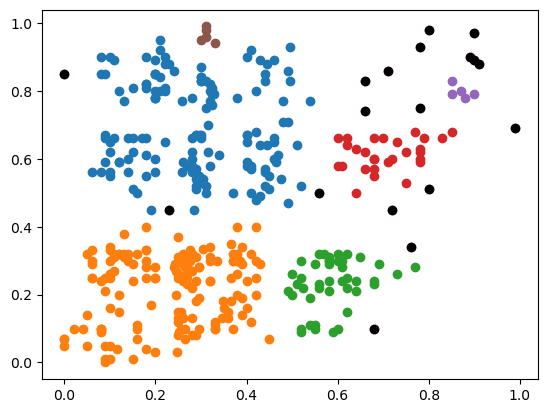

In [132]:
dbscan = DBSCAN(eps=0.07, min_samples = 5)
dbscan.fit(X)
cluster_dbscan = list(set(dbscan.labels_))
for cl in cluster_dbscan:
    plt.scatter(X[dbscan.labels_ == cl, 0], X[dbscan.labels_ == cl, 1])
plt.scatter(X[dbscan.labels_ == -1, 0], X[dbscan.labels_ == -1, 1], color="black")


<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5 color=yellow>
        <div  align=center>
        حالا با درنظر گرفتن همه پارمترها باردیگر مدل اجرا شد 
            که نتیجه ای نداشت و فقط یک کلاستر شناسایی شد

In [138]:
df.head(1)

,STG,SCG,STR,LPR,PEG
0,0.08,0.08,0.1,0.24,0.9


In [140]:
X = df.values
X

array([[0.08, 0.08, 0.1 , 0.24, 0.9 ],
       [0.06, 0.06, 0.05, 0.25, 0.33],
       [0.1 , 0.1 , 0.15, 0.65, 0.3 ],
       ...,
       [0.56, 0.6 , 0.77, 0.13, 0.32],
       [0.66, 0.68, 0.81, 0.57, 0.57],
       [0.68, 0.64, 0.79, 0.97, 0.24]])

In [145]:
eps = 0.07
min_samples = 6
result=pd.DataFrame(columns=['eps', 'min_samples', 'ClustersCounts', 'BouldinScore' , 'NoclusterSamples'])
i=0
for eps in [5,10,20]:
    for min_samples in [2,3,5,6,7]:
        i+=1
        dbscan = DBSCAN(eps=eps, min_samples = min_samples)
        dbscan.fit(X)
        cluster_dbscan = list(set(dbscan.labels_))
        # dbscan.labels_
        # try:
        ClustersCounts=len(cluster_dbscan)
        BouldinScore= davies_bouldin_score(X, dbscan.labels_)
        NoclusterSamples=np.unique((dbscan.labels_ == -1), return_counts=True)[1][1]
        result.loc[i,:]=[eps, min_samples, ClustersCounts, BouldinScore , NoclusterSamples]
        # except:
        #     print('error', len(cluster_dbscan))
result.sort_values('ClustersCounts')


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

### GaussianMixturegm

In [146]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=4, n_init=10)
gm.fit(X)

GaussianMixture(n_components=4, n_init=10)

In [147]:
gm.weights_

array([0.10031546, 0.28276262, 0.12667078, 0.49025114])